In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('Microsoft_Stock.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [4]:
df.shape

(9083, 7)

In [5]:
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

C:\Users\Zigron\AppData\Local\Temp\ipykernel_9060\2927484946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.shape

(9083, 1)

In [7]:
df.head()

,Open
Date,
1986-03-13,0.088542
1986-03-14,0.097222
1986-03-17,0.100694
1986-03-18,0.102431
1986-03-19,0.099826


In [8]:
df.tail()

,Open
Date,
2022-03-18,295.369995
2022-03-21,298.890015
2022-03-22,299.799988
2022-03-23,300.510010
2022-03-24,299.140015


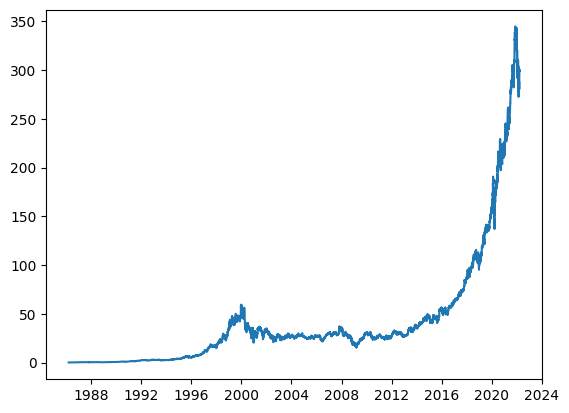

In [9]:
plt.plot(df)

In [10]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [12]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [13]:
look_back = 60
train_X, train_y = create_dataset(train_data, look_back)
test_X, test_y = create_dataset(test_data, look_back)
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [14]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.fit(train_X, train_y, epochs=100, batch_size=64)

Epoch 1/100
113/113 [==============================] - 4s 17ms/step - loss: 0.0029
Epoch 2/100
113/113 [==============================] - 2s 17ms/step - loss: 2.6849e-04
Epoch 3/100
113/113 [==============================] - 2s 17ms/step - loss: 2.5857e-04
Epoch 4/100
113/113 [==============================] - 2s 17ms/step - loss: 2.4492e-04
Epoch 5/100
113/113 [==============================] - 2s 18ms/step - loss: 2.2668e-04
Epoch 6/100
113/113 [==============================] - 2s 18ms/step - loss: 2.0743e-04
Epoch 7/100
113/113 [==============================] - 2s 17ms/step - loss: 1.9972e-04
Epoch 8/100
113/113 [==============================] - 2s 17ms/step - loss: 1.8448e-04
Epoch 9/100
113/113 [==============================] - 2s 17ms/step - loss: 1.7048e-04
Epoch 10/100
113/113 [==============================] - 2s 17ms/step - loss: 1.6627e-04
Epoch 11/100
113/113 [==============================] - 2s 19ms/step - loss: 1.6095e-04
Epoch 12/100
113/113 [=======================

In [16]:
test_predict = model.predict(test_X)

55/55 [==============================] - 1s 5ms/step


In [17]:
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

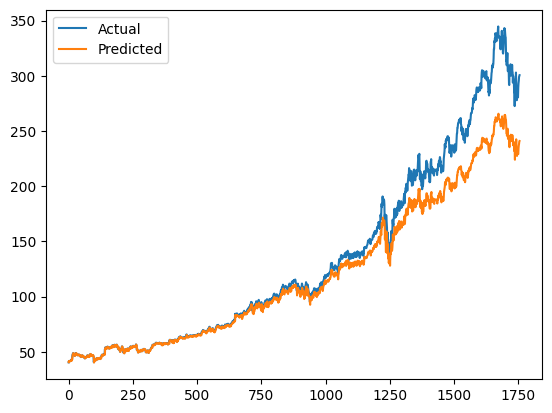

In [18]:
plt.plot(test_y[0], label='Actual')
plt.plot(test_predict[:,0], label='Predicted')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate model using metrics
mse = mean_squared_error(test_y[0], test_predict[:,0])
mae = mean_absolute_error(test_y[0], test_predict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(test_y[0], test_predict[:,0])

print('MSE: %.2f' % mse)
print('MAE: %.2f' % mae)
print('RMSE: %.2f' % rmse)
print('R-squared: %.2f' % r2)

MSE: 591.53
MAE: 13.91
RMSE: 24.32
R-squared: 0.92
